# Forbes Americas Top Colleges in 2019

## Introduction

Analyze the correlation between university rankings and various indicators. These indicators include annual cost, alumni salary, 
acceptance rate, SAT score, ACT score, etc. The main audience for our analysis of this data is to apply to students from 
different schools. This can more effectively help students choose a school that suits them. I hope you enjoy the tutorial!
(Information Sourced from: https://www.kaggle.com/chris95cam/forbes-americas-top-colleges-2019)

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics
import sklearn.linear_model
import numpy as np
from pandas.plotting import scatter_matrix
from statsmodels.formula.api import ols
from numpy.polynomial.polynomial import polyfit

## Loading Data

In [41]:
df = pd.read_csv("ForbesAmericasTopColleges2019.csv")
df

,Rank,Name,City,State,Public/Private,Undergraduate Population,Student Population,Net Price,Average Grant Aid,Total Annual Cost,Alumni Salary,Acceptance Rate,SAT Lower,SAT Upper,ACT Lower,ACT Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,646.0,New Mexico State University,Las Cruces,NM,Public,13379.0,14432.0,8625.0,9582.0,34720.0,96700.0,64.0,910.0,1160.0,18.0,23.0,www.nmsu.edu
646,647.0,Indiana State University,Terre Haute,IN,Public,13626.0,13763.0,13012.0,9297.0,32938.0,85600.0,85.0,900.0,1110.0,17.0,23.0,www.indstate.edu
647,648.0,Emory &amp; Henry College,Emory,VA,Private,1094.0,1226.0,19340.0,27155.0,48100.0,70700.0,72.0,988.0,1170.0,19.0,25.0,www.ehc.edu
648,649.0,Wells College,Aurora,NY,Private,488.0,516.0,22828.0,30207.0,55180.0,NaN,80.0,NaN,NaN,NaN,NaN,www.wells.edu


In [43]:
df = df.rename(columns = {'Undergraduate Population': 'UndergraduatePopulation', 'Student Population': 'StudentPopulation',\
                    'Net Price': 'NetPrice', 'Average Grant Aid':'AverageGrantAid','Total Annual Cost':'TotalAnnualCost',\
                    'Alumni Salary':'AlumniSalary','Acceptance Rate':'AcceptanceRate','SAT Lower':'SATLower',\
                    'SAT Upper':'SATUpper','ACT Lower':'ACTLower','ACT Upper':'ACT_Upper'}, inplace = False)
df

,Rank,Name,City,State,Public/Private,UndergraduatePopulation,StudentPopulation,NetPrice,AverageGrantAid,TotalAnnualCost,AlumniSalary,AcceptanceRate,SATLower,SATUpper,ACTLower,ACT_Upper,Website
0,1.0,Harvard University,Cambridge,MA,Private,13844.0,31120.0,14327.0,49870.0,69600.0,146800.0,5.0,1460.0,1590.0,32.0,35.0,www.harvard.edu
1,2.0,Stanford University,Stanford,CA,Private,8402.0,17534.0,13261.0,50134.0,69109.0,145200.0,5.0,1390.0,1540.0,32.0,35.0,www.stanford.edu
2,3.0,Yale University,New Haven,CT,Private,6483.0,12974.0,18627.0,50897.0,71290.0,138300.0,7.0,1460.0,1580.0,32.0,35.0,www.yale.edu
3,4.0,Massachusetts Institute of Technology,Cambridge,MA,Private,4680.0,11466.0,20771.0,43248.0,67430.0,155200.0,7.0,1490.0,1570.0,33.0,35.0,web.mit.edu
4,5.0,Princeton University,Princeton,NJ,Private,5659.0,8273.0,9327.0,48088.0,66150.0,139400.0,6.0,1430.0,1570.0,31.0,35.0,www.princeton.edu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,646.0,New Mexico State University,Las Cruces,NM,Public,13379.0,14432.0,8625.0,9582.0,34720.0,96700.0,64.0,910.0,1160.0,18.0,23.0,www.nmsu.edu
646,647.0,Indiana State University,Terre Haute,IN,Public,13626.0,13763.0,13012.0,9297.0,32938.0,85600.0,85.0,900.0,1110.0,17.0,23.0,www.indstate.edu
647,648.0,Emory &amp; Henry College,Emory,VA,Private,1094.0,1226.0,19340.0,27155.0,48100.0,70700.0,72.0,988.0,1170.0,19.0,25.0,www.ehc.edu
648,649.0,Wells College,Aurora,NY,Private,488.0,516.0,22828.0,30207.0,55180.0,NaN,80.0,NaN,NaN,NaN,NaN,www.wells.edu


## Exploratory Data Analysis

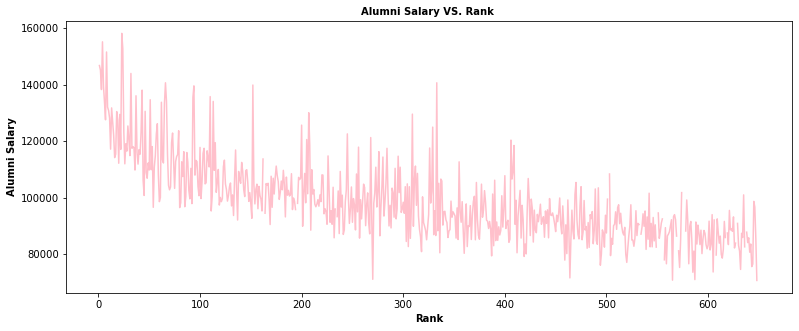

In [59]:
# temp1 = df[["Name", "Rank", "AlumniSalary"]]
# temp1 = temp1.pivot(index = 'Name', columns = 'Rank', values = 'AlumniSalary')
rank_list = df['Rank'].to_list()
salary_list = df['AlumniSalary'].to_list()
plt.figure(figsize = (13, 5))
plt.xlabel("Rank", size=10, weight='bold')
plt.ylabel("Alumni Salary", size=10, weight='bold')
plt.title("Alumni Salary VS. Rank ",size=10, weight='bold')
plt.plot(rank_list, salary_list, color = 'pink')
plt.show()

According to the plot above, the main trend shows a decreasing rate. As the value of rank increases, the Alumni Salary tends to be decreasing.
Students from the top college have a higher salary. Although there are some oscillations in the plot, but the central trend still tends to
be decreasing.

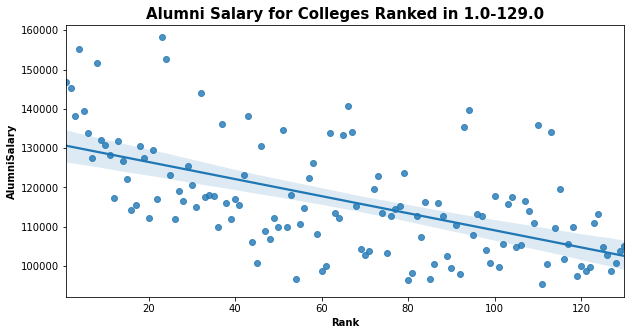

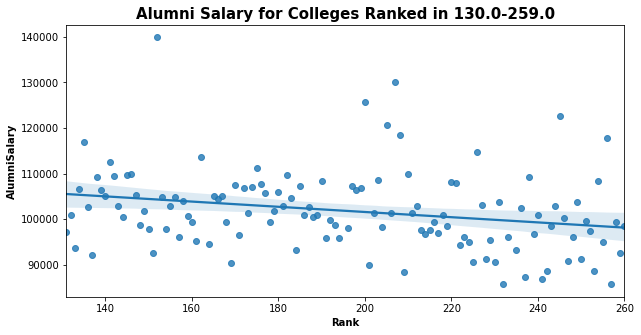

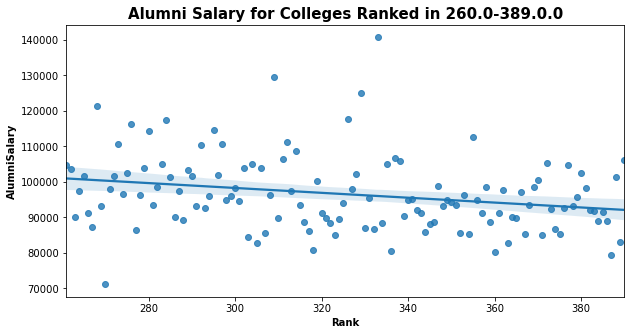

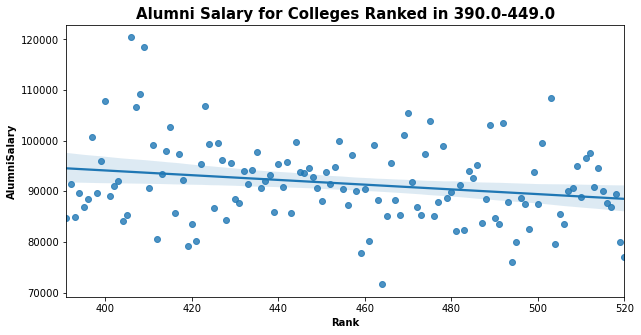

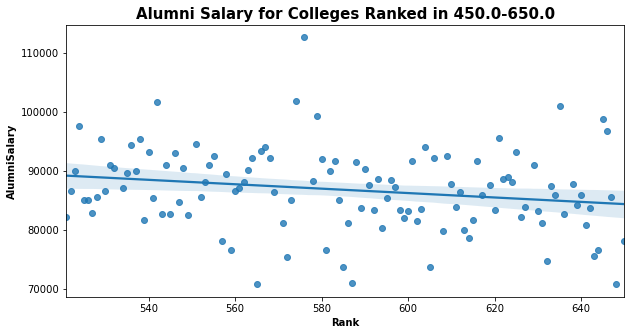

In [74]:
df['rankInterval'] = pd.cut(df['Rank'], bins = 5, labels = ['1.0-129.0', '130.0-259.0', '260.0-389.0.0', '390.0-449.0', '450.0-650.0'], right = False)
for rank, rank_group in df.groupby('rankInterval'):
    plt.figure(num = 3, figsize = (10, 5))
    plt.title("Alumni Salary for Colleges Ranked in " + rank, size=15, weight='bold')
    plt.xlabel("Mean of the Payroll (hundred million dollars)", size=10, weight='bold')
    plt.ylabel("Mean of the Winning Percentage (%)", size=10, weight='bold')
#     plt.scatter(rank_group['Rank'], rank_group['AlumniSalary'])
#     plt.show()
    sns.regplot(x="Rank", y="AlumniSalary", data=rank_group)
    plt.show()
    # label the team name for each scatter point
    # plt.annotate(str(rank_group['name'], (meanPayroll,meanWinPercentage))
#     rank_list = rank_group['Rank'].to_list()
#     salary_list = rank_group['AlumniSalary'].to_list() 
#     c, slope = polyfit(rank_list, salary_list, 1)
#     fx = np.multiply(slope, rank_list) + c
#     plt.plot(rank_list, fx, c = 'green')
#     plt.show()

## Correlation

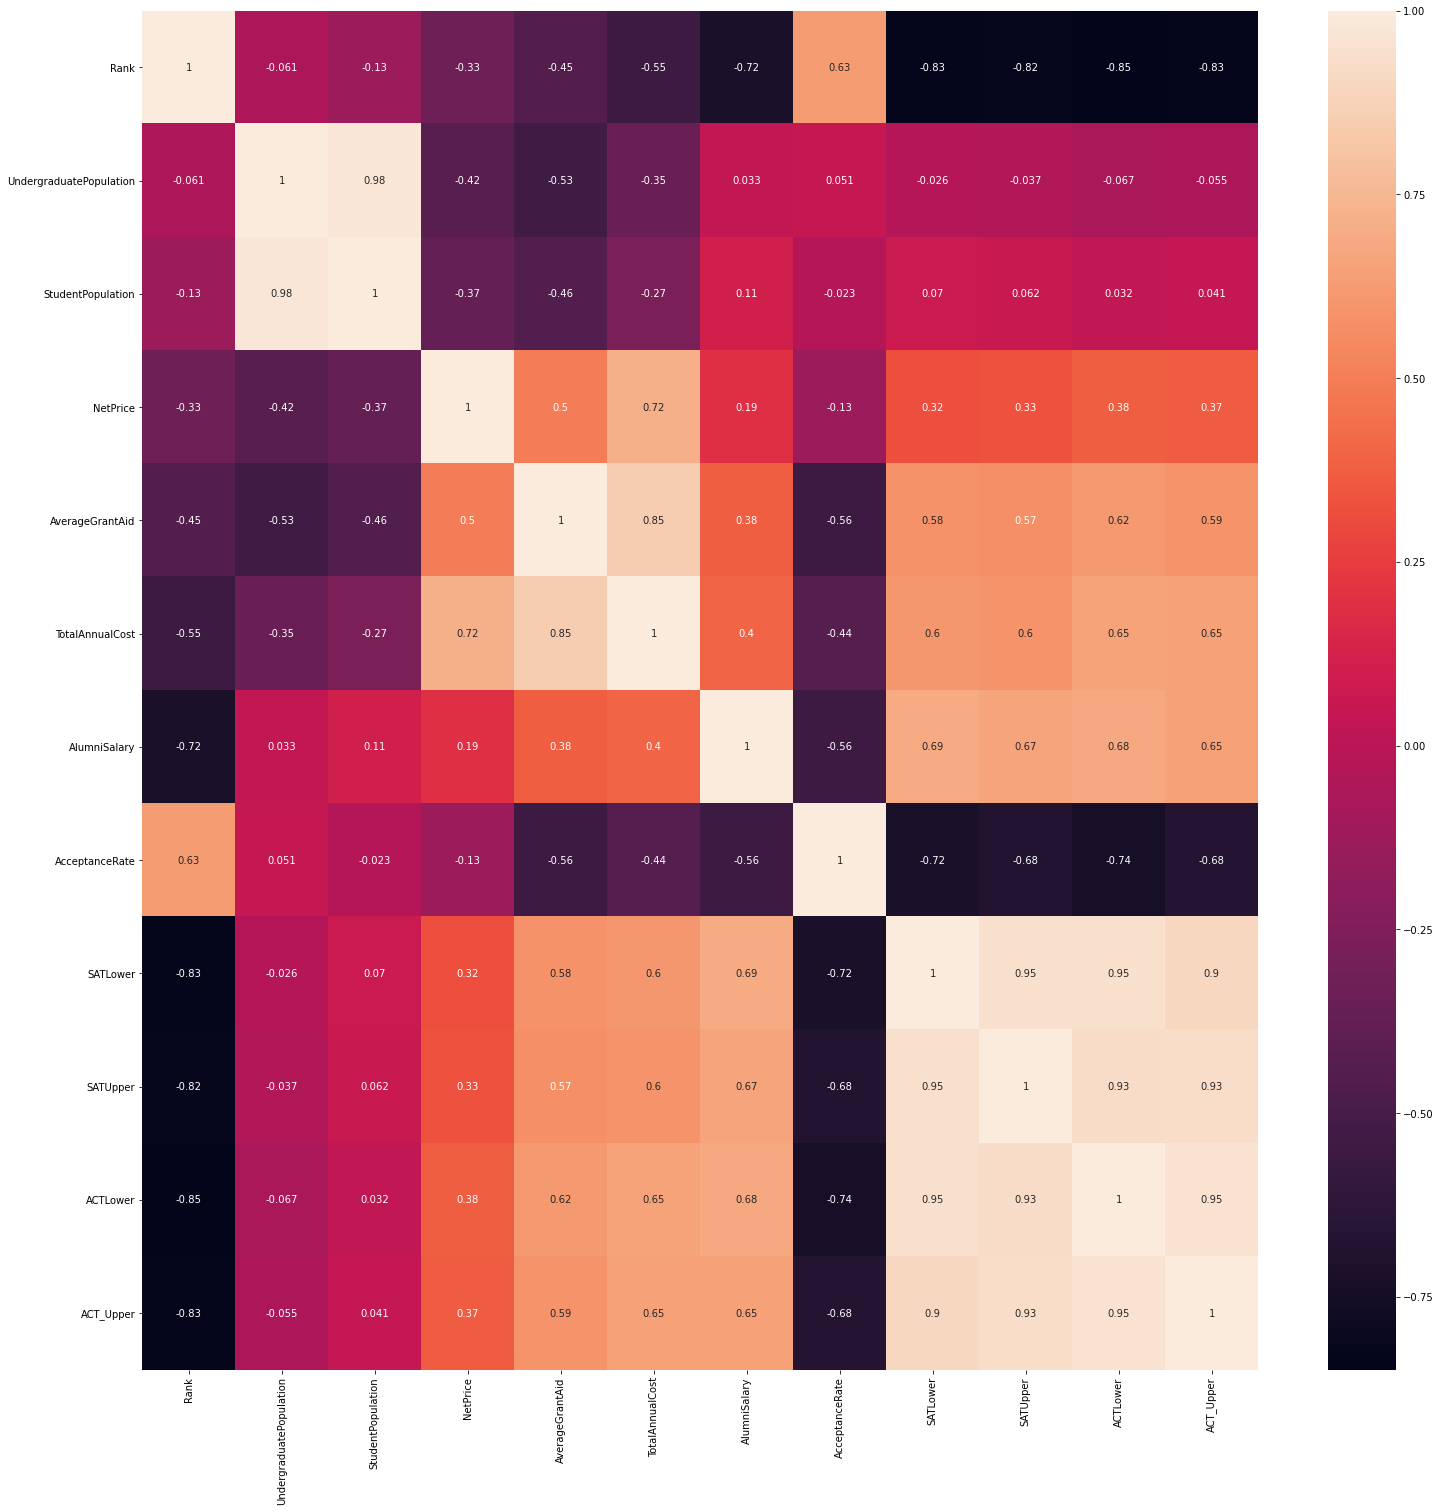

In [47]:
plt.gcf().set_size_inches((25, 25)) 
corr = df.corr()
sns.heatmap(corr, annot = True)
plt.show()

The plot shows there is a negative correlation which means a relationship or inverse relationship between two variables 
if higher values of one variable tend to be associated with lower values of the other. When the value is greather than or equal to 0.7, 
we can say there is a strong correlation. -0.72 represents the high negative correlation which indicates that the lower alumni salary, 
the lower value of rank. However, the value of rank is low means the the rank of the college is higher.

In [45]:
model1 = ols(formula = "Rank ~ AlumniSalary", data = df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     688.4
Date:                Wed, 21 Jul 2021   Prob (F-statistic):          3.03e-103
Time:                        05:09:37   Log-Likelihood:                -3986.2
No. Observations:                 635   AIC:                             7976.
Df Residuals:                     633   BIC:                             7985.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1248.3940     35.707     34.962      0.000    1178.275    1318.513
AlumniSalary    -0.0094      0.000    -26.237      0.000      -0.010      -0.009
==============================================================================
Omnibus:                       27.394   Durbin-Watson:                   0.847
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.334
Skew:                           0.177   Prob(JB):                     0.000772
Kurtosis:                       2.355   Cond. No.                     6.97e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.97e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the above table, we can see that the p-value is nearly to 0, which is less than the signigicance level at 0.05, therefore, there is a 
strong evidence to support that there is a relationship between Rank and AlumniSalary.
The R-square value in this model is 0.521, which is higher than 50%. We can say that this model is not bad for the provided dataset.

In [50]:
model2 = ols(formula = "Rank ~ SATLower", data = df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     1257.
Date:                Wed, 21 Jul 2021   Prob (F-statistic):          4.59e-144
Time:                        05:24:40   Log-Likelihood:                -3343.3
No. Observations:                 551   AIC:                             6691.
Df Residuals:                     549   BIC:                             6699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1695.5557     39.034     43.438      0.000    1618.881    1772.230
SATLower      -1.2384      0.035    -35.453      0.000      -1.307      -1.170
==============================================================================
Omnibus:                        2.311   Durbin-Watson:                   0.949
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                2.391
Skew:                           0.148   Prob(JB):                        0.303
Kurtosis:                       2.871   Cond. No.                     9.78e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.78e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

According to the above table, we can see that the p-value is nearly to 0, which is less than the signigicance level at 0.05, 
therefore, there is a strong evidence to support that there is a relationship between Rank and SAT score. 
The R-square value in this model is 0.696, which is closed to 70%. We can say that this model is a good fit to the provided dataset.

In [51]:
model3 = ols(formula = "Rank ~ UndergraduatePopulation", data = df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rank   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.409
Date:                Wed, 21 Jul 2021   Prob (F-statistic):              0.121
Time:                        05:25:52   Log-Likelihood:                -4323.5
No. Observations:                 650   AIC:                             8651.
Df Residuals:                     648   BIC:                             8660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 335.7412      9.883     33.972      0.000     316.335     355.147
UndergraduatePopulation    -0.0010      0.001     -1.552      0.121      -0.002       0.000
==============================================================================
Omnibus:                      377.243   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.647
Skew:                          -0.001   Prob(JB):                     6.69e-09
Kurtosis:                       1.821   Cond. No.                     2.01e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Based on the plot, we can see that the p-value is 0.121. The p-value is greather than the signigicance level at 0.05. 
Thus, there is no strong evidence to support that there is a relationship between Rank and Undergraduate Population. 
The R-square value in this model is 0.004, which is very low. Therefore, if R-square tend to be lower, 
the model won't fit with my data.

In [ ]:
# conclusion